In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd Dataset/

/home/davidoh/Documents/Pokemon/Dataset


In [3]:
df = pd.read_csv("pokemon.csv")
df.head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [4]:
df[df["is_legendary"]==1].head(3)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
143,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,NaN,144,95,125,85,ice,flying,55.4,1,1
144,"['Pressure', 'Static']",0.50,1.0,1.0,1.0,1.0,0.5,1.0,0.5,1.0,...,NaN,145,125,90,100,electric,flying,52.6,1,1
145,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,...,NaN,146,125,85,90,fire,flying,60.0,1,1


In [5]:
for col in df.columns:
    if col.startswith("against_"):
        df=df.drop(columns=[col])

In [6]:
#?df.drop
df.head(3)

,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0


In [7]:
#returns every row in df that has legenddary = 1
df[df["is_legendary"]==1].head(3)


,abilities,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
143,"['Pressure', 'Snow Cloak']",85,20480,35,580,3,Freeze Pokémon,100,1250000,1.7,...,NaN,144,95,125,85,ice,flying,55.4,1,1
144,"['Pressure', 'Static']",90,20480,35,580,3,Electric Pokémon,85,1250000,1.6,...,NaN,145,125,90,100,electric,flying,52.6,1,1
145,"['Pressure', 'Flame Body']",100,20480,35,580,3,Flame Pokémon,90,1250000,2.0,...,NaN,146,125,85,90,fire,flying,60.0,1,1


In [8]:
df.isnull().any()

abilities            False
attack               False
base_egg_steps       False
base_happiness       False
base_total           False
capture_rate         False
classfication        False
defense              False
experience_growth    False
height_m              True
hp                   False
japanese_name        False
name                 False
percentage_male       True
pokedex_number       False
sp_attack            False
sp_defense           False
speed                False
type1                False
type2                 True
weight_kg             True
generation           False
is_legendary         False
dtype: bool

In [9]:
df = df.drop(columns=["height_m","capture_rate","percentage_male","type2","weight_kg","abilities","classfication","japanese_name","name","pokedex_number","generation"])

In [10]:
df.isnull().any()

attack               False
base_egg_steps       False
base_happiness       False
base_total           False
defense              False
experience_growth    False
hp                   False
sp_attack            False
sp_defense           False
speed                False
type1                False
is_legendary         False
dtype: bool

In [11]:
df.head(30)

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,hp,sp_attack,sp_defense,speed,type1,is_legendary
0,49,5120,70,318,49,1059860,45,65,65,45,grass,0
1,62,5120,70,405,63,1059860,60,80,80,60,grass,0
2,100,5120,70,625,123,1059860,80,122,120,80,grass,0
3,52,5120,70,309,43,1059860,39,60,50,65,fire,0
4,64,5120,70,405,58,1059860,58,80,65,80,fire,0
5,104,5120,70,634,78,1059860,78,159,115,100,fire,0
6,48,5120,70,314,65,1059860,44,50,64,43,water,0
7,63,5120,70,405,80,1059860,59,65,80,58,water,0
8,103,5120,70,630,120,1059860,79,135,115,78,water,0
9,30,3840,70,195,35,1000000,45,20,20,45,bug,0


In [12]:
df.dtypes

attack                int64
base_egg_steps        int64
base_happiness        int64
base_total            int64
defense               int64
experience_growth     int64
hp                    int64
sp_attack             int64
sp_defense            int64
speed                 int64
type1                object
is_legendary          int64
dtype: object

In [13]:
#converts object type as category
df["type1"] = df["type1"].astype("category")

In [14]:
df.dtypes

attack                  int64
base_egg_steps          int64
base_happiness          int64
base_total              int64
defense                 int64
experience_growth       int64
hp                      int64
sp_attack               int64
sp_defense              int64
speed                   int64
type1                category
is_legendary            int64
dtype: object

In [15]:
#converts categories at codes
df["type1"] = df["type1"].cat.codes

In [16]:
Y = df["is_legendary"].values
X = df.drop(columns=["is_legendary"]).values

In [17]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [18]:
XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)

In [19]:
legendary_model = LR().fit(XTRAIN, YTRAIN)
legendary_prediction = legendary_model.predict(XTEST)
accuracy_score(YTEST, legendary_prediction)

/opt/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9850746268656716

0.8720078163165609

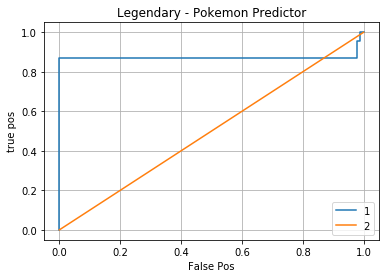

In [20]:
SY = legendary_model.predict_proba(XTEST)[:,1]
SFPR, STPR, STHRESH = roc_curve(YTEST, SY)
plt.plot(SFPR, STPR, label="1")
plt.plot([0,1],[0,1],label="2")
plt.legend()
plt.grid()
plt.xlabel("False Pos")
plt.ylabel("true pos")
plt.title("Legendary - Pokemon Predictor")

metrics.auc(SFPR, STPR)

In [21]:
#graph relationship of variables
legend_df = df.loc[df["is_legendary"]==1]
not_legend_df = df.loc[df["is_legendary"]==0]

In [22]:
legend_df.head(3)

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,hp,sp_attack,sp_defense,speed,type1,is_legendary
143,85,20480,35,580,100,1250000,90,95,125,85,11,1
144,90,20480,35,580,85,1250000,90,125,90,100,3,1
145,100,20480,35,580,90,1250000,90,125,85,90,6,1


In [23]:
not_legend_df.head(3)

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,hp,sp_attack,sp_defense,speed,type1,is_legendary
0,49,5120,70,318,49,1059860,45,65,65,45,9,0
1,62,5120,70,405,63,1059860,60,80,80,60,9,0
2,100,5120,70,625,123,1059860,80,122,120,80,9,0


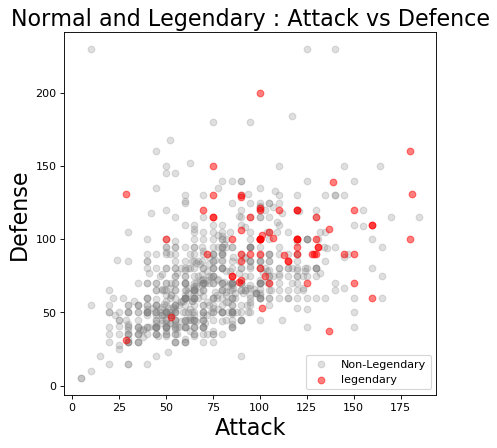

In [24]:
plt.figure(figsize=(6, 6), dpi=80)
plt.scatter(not_legend_df['attack'],not_legend_df['defense'], alpha=0.25, color='grey', label='Non-Legendary')
plt.scatter(legend_df['attack'],legend_df['defense'], alpha=0.5 ,color='red', label='legendary')
plt.xlabel("Attack",fontsize=20)
plt.ylabel("Defense",fontsize=20)
plt.title("Normal and Legendary : Attack vs Defence", fontsize=20)
plt.legend()
plt.show()

In [25]:
# Mean attack score of legendary vs non-legendary Pokemon
a=legend_df['attack'].mean()
b=not_legend_df['attack'].mean()

print("Non Legendary attack mean: ", b)
print("Legendary attack mean:     ", a)

Non Legendary attack mean:  74.84131326949384
Legendary attack mean:      109.35714285714286


In [26]:
# Mean defense score of legendary vs non-legendary Pokemon
a=legend_df['defense'].mean()
b=not_legend_df['defense'].mean()

print("Non Legendary defense mean: ", b)
print("Legendary defense mean:     ", a)

Non Legendary defense mean:  70.48153214774281
Legendary defense mean:      99.4


In [27]:
px = df["experience_growth"].values
py = df["is_legendary"].values

Text(0.5, 1.0, 'Exp Growth Comparison')

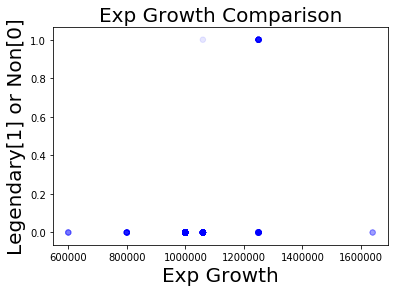

In [39]:
my_color = np.where(py>1, 'red', 'blue')

#plt.vlines(x=px, ymin=0, ymax=py, color=my_color, alpha=0.03)
#plt.scatter(px, py, alpha=0.03)
plt.scatter(x=px, y=py, color=my_color, s=30, alpha=0.03)
plt.xlabel("Exp Growth",fontsize=20)
plt.ylabel("Legendary[1] or Non[0]",fontsize=20)
plt.title("Exp Growth Comparison", fontsize=20)